Kacper Boruta, 272413,INS, PSD


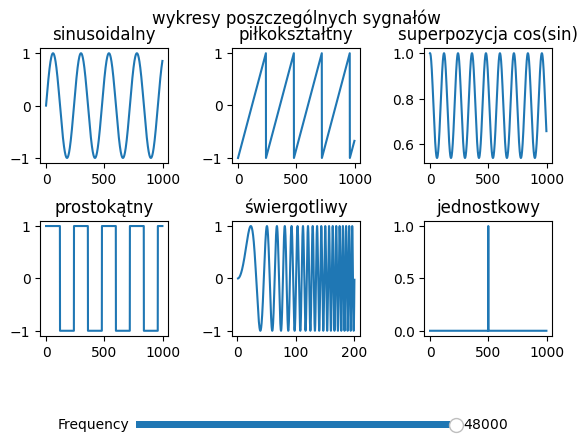

In [1]:
print("Kacper Boruta, 272413,INS, PSD");

#Lab 1
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from matplotlib.widgets import Slider

import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from matplotlib.widgets import Slider




fs = 48000
f = 200
n = np.arange(1000)

faza = (n * 2 * np.pi * f / fs) % (2 * np.pi)

sinus = np.sin(faza)
prostokat = signal.square(faza)
pilka = signal.sawtooth(faza)

k = np.linspace(1, 200, fs // 10)
swiergot = np.sin(2 * np.pi * np.arange(fs // 10) * k / fs)

sin = np.sin(faza)
super = np.cos(sin)

jednostkowy = signal.unit_impulse(len(n), 'mid')

fig, axs = plt.subplots(2, 3)
fig.suptitle('wykresy poszczególnych sygnałów')

axs[0, 0].plot(n, sinus)
axs[0, 0].set_title("sinusoidalny")
axs[1, 0].plot(n, prostokat)
axs[1, 0].set_title("prostokątny")
axs[0, 1].plot(n, pilka)
axs[0, 1].set_title("piłkokształtny")
axs[1, 1].plot(k, swiergot)
axs[1, 1].set_title("świergotliwy")
axs[0, 2].plot(n, super)
axs[0, 2].set_title("superpozycja cos(sin)")
axs[1, 2].plot(n, jednostkowy)
axs[1, 2].set_title("jednostkowy")

ax_slider = plt.axes([0.25, 0.1, 0.5, 0.03], facecolor='lightgoldenrodyellow')
slider = Slider(ax_slider, 'Frequency', 1000.0, 48000.0, valinit=fs)


def update(val):
    fs = slider.val

    faza = (n * 2 * np.pi * f / fs) % (2 * np.pi)
    sinus = np.sin(faza)
    axs[0, 0].clear()
    axs[0, 0].plot(n, sinus)

    prostokat = signal.square(faza)
    axs[1, 0].clear()
    axs[1, 0].plot(n, prostokat)

    pilka = signal.sawtooth(faza)
    axs[0, 1].clear()
    axs[0, 1].plot(n, pilka)

    swiergot = signal.chirp(n, f0=1000, f1=4800, t1=len(n) / 3*fs)
    axs[1, 1].clear()
    axs[1, 1].plot(n, swiergot)

    sin = np.sin(faza)
    super = np.cos(sin)%fs
    axs[0, 2].clear()
    axs[0, 2].plot(n, super)

    jednostkowy = signal.unit_impulse(len(n), 'mid')
    axs[1, 2].clear()
    axs[1, 2].plot(n, jednostkowy)

    fig.canvas.draw_idle()

slider.on_changed(update)


plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.3, hspace=0.5, wspace=0.5)

plt.show()



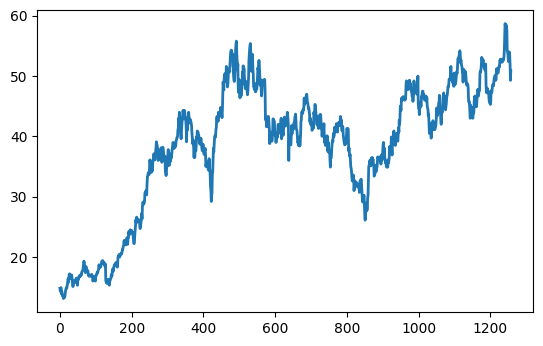

In [8]:
#zadanie 2
import pandas as pd
freq = 1.0
dane = pd.read_csv(r"C:\Users\user\Desktop\studia\Przetwrzanie strumieni danych\dane.csv")
fig, ax = plt.subplots()
plt.subplots_adjust(bottom=0.25)
x=dane.index
y=dane['15.0']*freq
l, = ax.plot(x,y,lw=2)
"""
ax_slider = plt.axes([0.25,0.1,0.65,0.03],facecolor = 'lightgoldenrodyellow')
slider = Slider(ax_slider,'Frequency',0.1,5.0,valinit=freq)

def update(val):
    freq = slider.val
    l.set_ydata(dane['15.0']*freq)
    fig.canvas.draw_idle()
    
slider.on_changed(update)"""
plt.show()

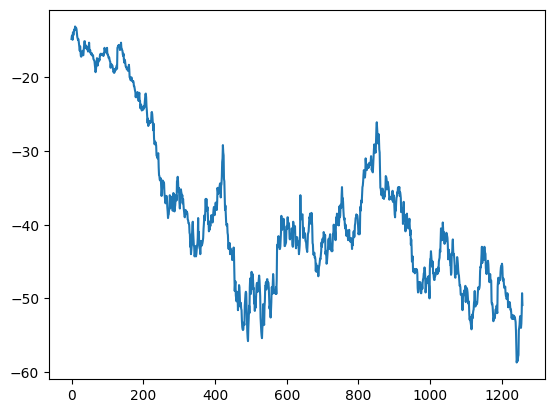

In [9]:

# zad 3
x = dane.index
y = dane['15.0']*(-1**x)
plt.plot(x,y)
plt.show()
y.to_csv(r'C:\Users\user\Desktop\studia\Przetwrzanie strumieni danych.csv',index = True, sep = ';')

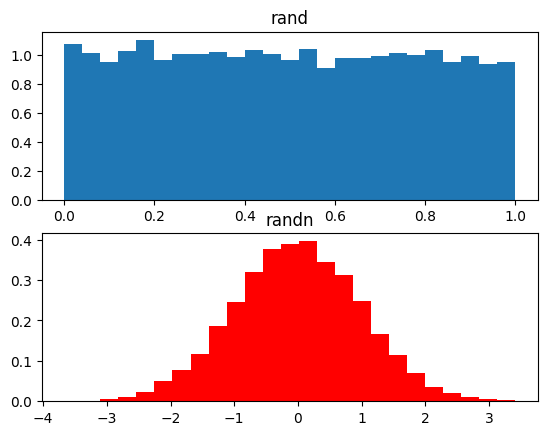

In [12]:
#zad 4

t = 5
f = 2000
ilosc = t * f
przebieg_rand = np.random.rand(ilosc)
przebieg_randn = np.random.randn(ilosc)
plt.subplot(2, 1, 1)
plt.hist(przebieg_rand, bins=25, density=True)
plt.title('rand')
plt.subplot(2, 1, 2)
plt.hist(przebieg_randn, bins=25, density=True, color='red')
plt.title('randn')
plt.show()

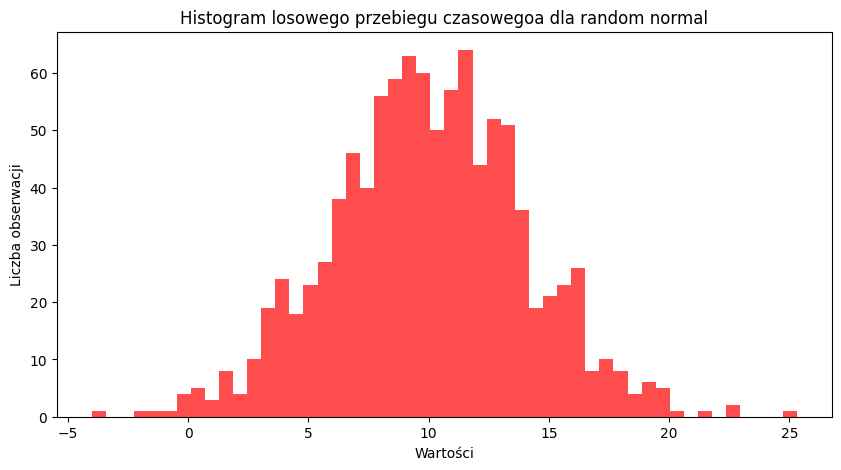

In [13]:
# zad 5
x = np.random.normal(10,4,1000)
# Wygenerowanie histogramu
plt.figure(figsize=(10, 5))
plt.hist(x, bins=50, color='red', alpha=0.7)
plt.title('Histogram losowego przebiegu czasowegoa dla random normal')
plt.xlabel('Wartości')
plt.ylabel('Liczba obserwacji')
plt.show()


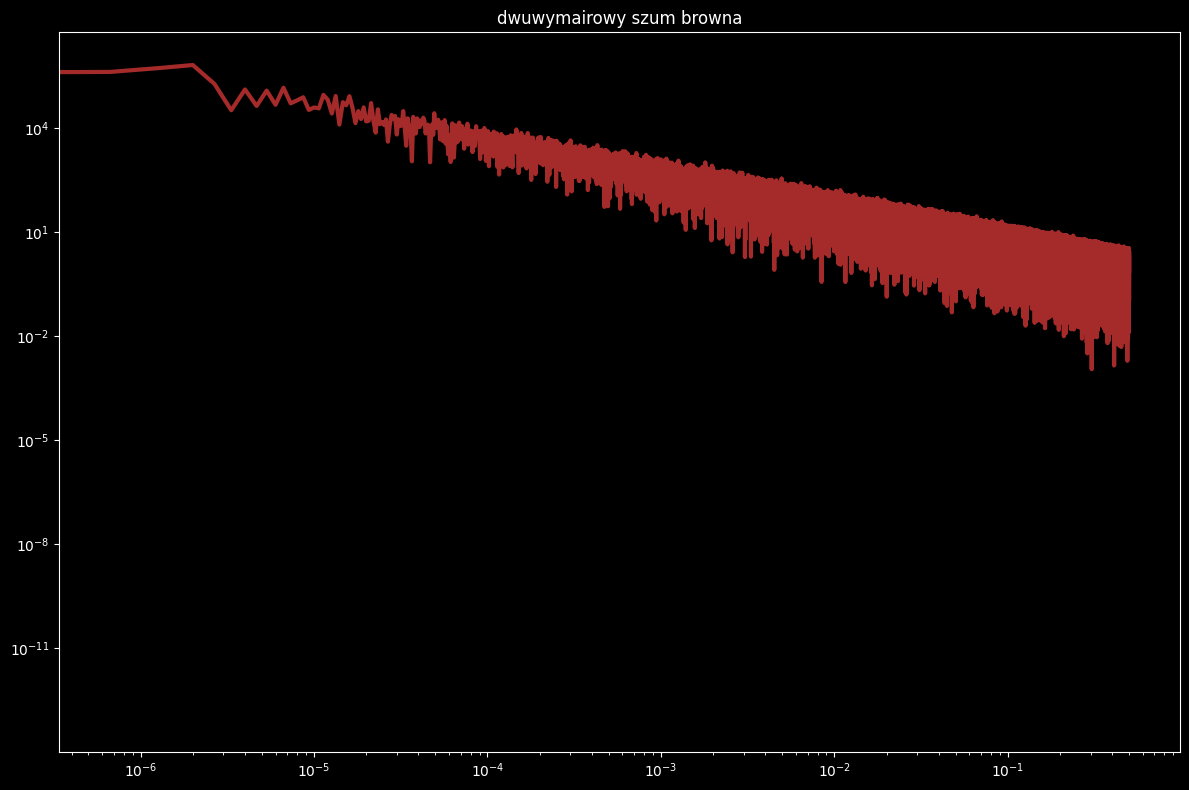

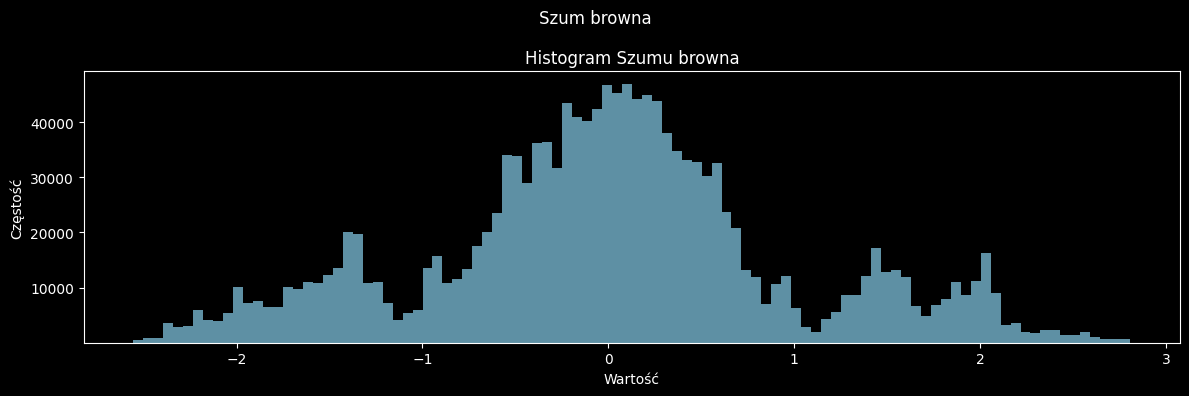

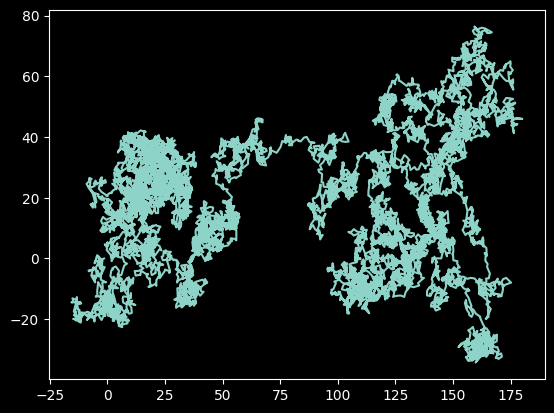

In [15]:
#zad 6 i 7

import numpy as np
import matplotlib.pyplot as plt

# Funkcja do rysowania  czerwonego szumu
def rysuj_wykres(sygnal, kolor, etykieta): #wykres
    czestotliwosc = np.fft.rfftfreq(len(sygnal)) #generowanie tablicy czestotliwosci dla transformaty furiera w zaleznosci od dlugosci sygnalu
    plt.loglog(czestotliwosc, np.abs(np.fft.rfft(sygnal)), label=etykieta, color=kolor, linewidth=3)

# Funkcja do generowania  szumu
def generuj_czerwony_szum(N, psd): #generuje czerwony szum na podstawie bialego
    bialy_szum = np.fft.rfft(np.random.randn(N))
    widmo_kolorowe = psd(np.fft.rfftfreq(N))
    widmo_kolorowe /= np.sqrt(np.mean(widmo_kolorowe ** 2))  # Normalizacja widma
    szum_kolorowy = bialy_szum * widmo_kolorowe
    return np.fft.irfft(szum_kolorowy)

# Funkcja określająca PSD dla szumu browna psd-gestosc widmowa mocy czyli jaka moc w zaleznosci od czestotliwosci
def psd_szumu_brownowskiego(f):
    return 1 / np.where(f == 0, np.inf, f)

# Funkcja do rysowania  szumu browna
def rysuj_szum_brownowski():
    N = 30 * 50000
    szum = generuj_czerwony_szum(N, psd_szumu_brownowskiego)
    rysuj_wykres(szum, 'brown', 'Szum brownowski')


# Dodanie histogramu
    plt.figure(figsize=(12, 4), tight_layout=True)
    plt.hist(szum, bins=100, color='skyblue', alpha=0.7)
    plt.title('Histogram Szumu browna')
    plt.xlabel('Wartość')
    plt.ylabel('Częstość')

# Ustawienia wykresu
plt.style.use('dark_background')
plt.figure(figsize=(12, 8), tight_layout=True)
plt.title('dwuwymairowy szum browna')

# Generowanie i rysowanie szumu browna
rysuj_szum_brownowski()

# Konfiguracja wykresu

plt.suptitle("Szum browna")
plt.ylim([1e-3, None])
plt.show()

#zad 7
t=10
f=1000
n = t*f
szum = np.random.randn(2,n)
szum_br = np.cumsum(szum,axis=1)
plt.plot(szum_br[0],szum_br[1])
plt.show()